# 2-wymiarowy rozkład Normalny

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rnd
import scipy.stats as stats
from scipy.stats import multivariate_normal

# Zadanie 
Proszę wygenerować próbkę z rozkładu Normalnego
$$
m = [0,0]
$$

oraz

$$
\Sigma = [[4.40, -2.75], [-2.75,  5.50]]
$$

In [2]:
mean1 = np.array([0, 0])
cov1 = np.array([[4.40, -2.75], [-2.75,  5.50]])
X1_rv=multivariate_normal(mean1, cov1)
X = X1_rv.rvs(1000)

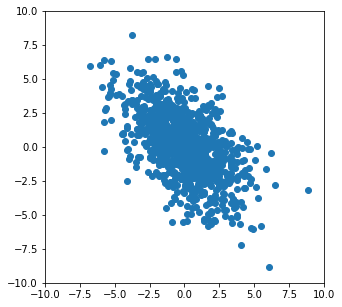

In [3]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
ax.scatter(X[:, 0], X[:, 1])
ax.set_xlim([-10,10])
ax.set_ylim([-10,10])
plt.show()

# Zadanie 
Proszę policzyć średnią oraz macierz kowariancji próbki.

In [4]:
means = X.mean(axis=0)
cov = np.cov(X.T)

# Zadanie
Proszę zdefiniować zmienną losową o razkładzie zadanym na podstawie empirycznej średniej i kowariancji oraz narysować na jednym wykresie:

- próbkę
- poziomice rozkładu normalnego 

In [7]:
X2_rv=multivariate_normal(means, cov)

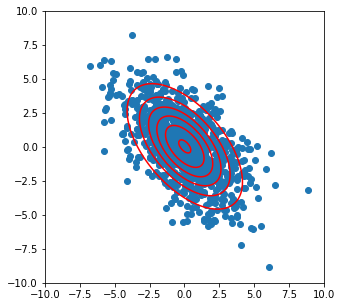

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
ax.scatter(X[:, 0], X[:, 1])
ax.set_xlim([-10,10])
ax.set_ylim([-10,10])

x, y = np.mgrid[-10:10:.1, -10:10:.1]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
ax.contour(x, y, X2_rv.pdf(pos), 6, colors = 'r')
plt.show()

# Zadanie
Policz wektory i wartości własne macierzy kowariancji. Narysuj na jednym wykresie

- próbkę
- poziomice rozkładu normalnego 
- wektory własne macierzy kowariancji 

[0.02372174 0.03584637]
[-0.77157764  0.63613516]
[[ 0.02372174  0.03584637  3.675971   -4.45863897]
 [ 0.02372174  0.03584637 -2.31411292 -1.90789432]]


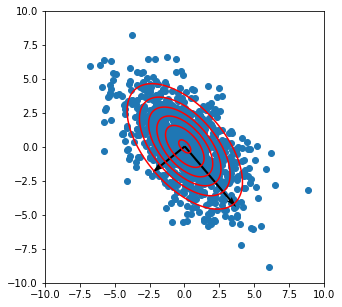

In [9]:
e_values, e_vectors = np.linalg.eig(cov)
print(means)
print(e_vectors[0,:])

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
ax.scatter(X[:, 0], X[:, 1])
ax.set_xlim([-10,10])
ax.set_ylim([-10,10])

#plot eigen vectors
soa =np.array( [ [means[0],means[1],2*np.sqrt(e_values[1])*e_vectors[0,1],2*np.sqrt(e_values[1])*e_vectors[1,1]],
                 [means[0],means[1],2*np.sqrt(e_values[0])*e_vectors[0,0],2*np.sqrt(e_values[0])*e_vectors[1,0]]] )
print(soa)
X1,Y1,U1,V1 = zip(*soa)
ax.quiver(X1,Y1,U1,V1,angles='xy',scale_units='xy',scale=1)

# plot levelsets
x, y = np.mgrid[-10:10:.1, -10:10:.1]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
ax.contour(x, y, X2_rv.pdf(pos), 6, colors = 'r')
plt.show()

# Zadanie 
Proszę wygenerować próbkę na kwadracie $[0,1] \times [0,1]$.
Następnie proszę policzyć średnią oraz macierz kowariancji próbki.

Narysuj na jednym wykresie

- próbkę
- poziomice rozkładu normalnego 
- wektory własne macierzy kowariancji 

[ 0.50808451  0.5058539 ]
[-0.92741051 -0.37404512]
[[ 0.50808451  0.5058539  -0.21405639 -0.53073315]
 [ 0.50808451  0.5058539  -0.51755339  0.2087407 ]]


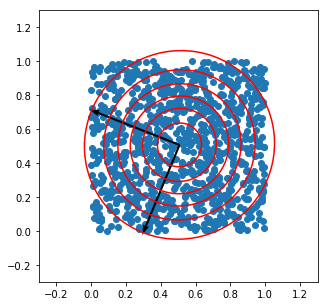

[0.49145083 0.50280609]
[-0.73437067 -0.67874864]
[[ 0.49145083  0.50280609 -0.40103962 -0.43390398]
 [ 0.49145083  0.50280609 -0.42842435  0.39597503]]


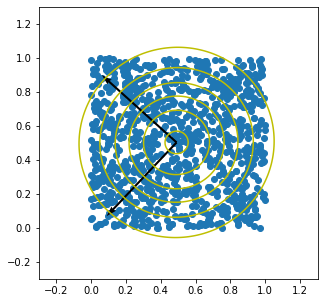

In [10]:
X =np.stack( (stats.uniform(0, 1).rvs(1000),stats.uniform(0, 1).rvs(1000)), 1)

means = X.mean(axis=0)
cov = np.cov(X.T)
X2_rv=multivariate_normal(means, cov)

e_values, e_vectors = np.linalg.eig(cov)

print(means)
print(e_vectors[0,:])

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
ax.scatter(X[:, 0], X[:, 1])
ax.set_xlim([-0.3,1.3])
ax.set_ylim([-0.3,1.3])

soa =np.array( [ [means[0],means[1], 2 * np.sqrt(e_values[1]) * e_vectors[0,1], 2 * np.sqrt(e_values[1]) * e_vectors[1,1]],
                 [means[0],means[1], 2 * np.sqrt(e_values[0]) * e_vectors[0,0], 2 * np.sqrt(e_values[0]) * e_vectors[1,0]]] )
print(soa)

X1,Y1,U1,V1 = zip(*soa)
ax.quiver(X1,Y1,U1,V1,angles='xy',scale_units='xy',scale=1)

x, y = np.mgrid[-1.3:1.3:.01, -1.3:1.3:.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
ax.contour(x, y, X2_rv.pdf(pos), 6, colors = 'y')
plt.show()